# Guruprasad Velikadu Krishnamoorthy
# DSC530- Assignment Week 7

## Initial Setup

In [1]:
# Download basename and exists from OS module which will be used in the download function
from os.path import basename, exists

# Create a function named download_file, to dounload the scripts and files from Github to local path
def download_files(url):
    """
    Downloads the scripts/ files from Github to local directory
    takes url as input.
    """
    filename = basename(url)
    # Checking if the file exists in the local directory and it downloads the file if it doesn't exist already.
    if not exists(filename):
        from urllib.request import urlretrieve
        # Downloading the files to the local path
        local, _ = urlretrieve(url, filename)
        # Printing confirmation message
        print("Downloaded " + local)

In [2]:
#  Calling download functions to download .py files and data files used throughtout this assignment
download_files("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download_files("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download_files("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download_files("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download_files("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")


In [3]:
# Importing the nsfg and other modules module from the author's code
import nsfg
import thinkstats2
import thinkplot

# importing the required libraries
import numpy as np
import sys
from collections import defaultdict
import math
import itertools
import pandas as pd
import scipy.stats as sci
import random
import matplotlib.pyplot as plt


# Exercise 7.1

### Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [4]:
# Creating Pregnancy Dataframe using the nfsg module 
pregnancy_df = nsfg.ReadFemPreg()
# Creating seperate dataframes for Live births, first and other births
live_births = pregnancy_df[pregnancy_df.outcome == 1]
first_births = live_births[live_births.birthord == 1]
other_births = live_births[live_births.birthord != 1]

In [5]:
# agrepreg is the column that contains the age of the mother while pregnant
# totalwgt_lb is the column that contains the weight of the baby in pounds
# Cleansing the live births dataFrame by removing the rows that have na in either agrepreg or totalweight.
live_births = live_births.dropna(subset=['agepreg', 'totalwgt_lb'])

##### Scatter plot of Birth weight vs Mother's age.

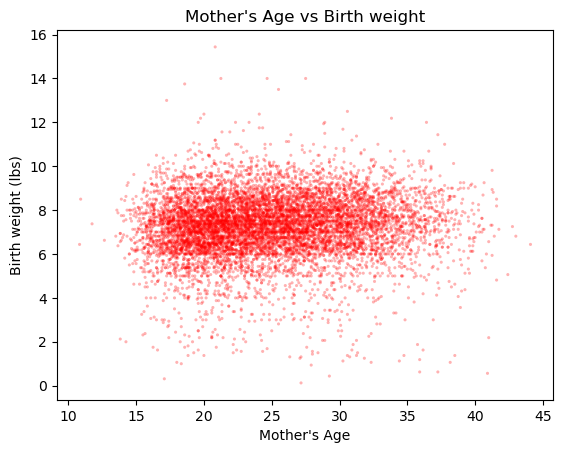

In [6]:
# Creating variables for Birth weight and Mother's age.
mothers_age = live_births.agepreg
birth_weight = live_births.totalwgt_lb
# Using Scatter method of thinkplot to create Scatter Plot
thinkplot.Scatter(mothers_age, birth_weight, alpha=0.3,s=5,color="red")
thinkplot.Config(xlabel="Mother's Age",
                     ylabel='Birth weight (lbs)',
                 title="Mother's Age vs Birth weight"
                )


##### Percentile Plot of birth weight versus mother’s age

##### ***Approach:***  To plot a Percentile plot, we first create bins for Mother's age as this is x-axis.Then, we classify the age into each bin and group the age into different groups. Then for each group, we calculate the CDF, from which we can compute the percentile for 80%, 60% , 40% and 20%. Then the results are plotted.

In [7]:
# Looking at the x-axis of the scatter plot we can determine the range of Mother's age is from 
# 10 to 45 years. This will be used in our calculation of bin in the interval of 3 years.
age_bins = np.arange(10, 45, 3)
# This will calculate the index of the bin in which agepref belongs to . Results will be an array of indices.
age_indices = np.digitize(pregnancy_df.agepreg, age_bins)
# The groupby command creates groups based on the index array created above
age_groups = pregnancy_df.groupby(age_indices)
# The below results shows we have 12 groups and the count of rows in each group
for i, group1 in age_groups:
    print(i,len(group1))



1 20
2 393
3 1911
4 2708
5 2396
6 2065
7 1645
8 1120
9 601
10 289
11 80
12 365


In [8]:
# Calculate the Mean of age in each group and append them to a list mean_ages. This is required to plot
# the Percentile plot.
mean_ages=[]
for j,group2 in age_groups:
    # Calculate mean for each group
    mean_age=group2.agepreg.mean()
    # Append the results to the list
    mean_ages.append(mean_age)
# Removing the outliers by excluding the extreme values. we exclude the first and last group in the results
mean_ages=mean_ages[1:len(mean_ages)-1]

In [9]:
# Calculate the CDF of birth weight in each group and append them to a list cdf_weights. This is required to plot
# the Percentile plot.
cdf_weights=[]
for k,group3 in age_groups:
    # For each group calculate the CDF of birth weight using thinkplot2
    cdf_weight=thinkstats2.Cdf(group3.totalwgt_lb)
    # Append the CDF to the list
    cdf_weights.append(cdf_weight)

# Removing the outliers by excluding the extreme values. we exclude the first and last group in the results
cdf_weights=cdf_weights[1:len(cdf_weights)-1]
# For display purpose printing only the first element of the list
cdf_weights[0]

Cdf([ 2.      2.125   2.3125  2.375   3.25    3.375   3.625   4.      4.5
  4.625   4.6875  4.9375  5.1875  5.3125  5.375   5.5     5.5625  5.625
  5.6875  5.75    5.8125  5.875   6.      6.0625  6.125   6.1875  6.25
  6.3125  6.375   6.4375  6.5     6.5625  6.625   6.6875  6.75    6.8125
  6.875   6.9375  7.      7.0625  7.125   7.1875  7.25    7.3125  7.375
  7.4375  7.5     7.5625  7.625   7.6875  7.75    7.8125  7.875   7.9375
  8.      8.0625  8.125   8.1875  8.25    8.3125  8.375   8.4375  8.5
  8.625   8.6875  8.8125  8.875   8.9375  9.      9.125   9.25    9.625
 10.0625], [0.00555556 0.01111111 0.01666667 0.02222222 0.02777778 0.03333333
 0.03888889 0.04444444 0.05555556 0.06666667 0.07222222 0.07777778
 0.1        0.10555556 0.11666667 0.12777778 0.15       0.15555556
 0.16666667 0.17777778 0.18333333 0.18888889 0.21111111 0.22777778
 0.25       0.28333333 0.30555556 0.32777778 0.33333333 0.35555556
 0.37222222 0.38333333 0.40555556 0.42222222 0.45       0.46666667
 0.4833333

Percentile 75 Values are: [7.8125, 7.9375, 7.9375, 8.1875, 8.1875, 8.25, 8.3125, 8.375, 8.25, 8.1875]
Percentile 50 Values are: [7.0, 7.1875, 7.25, 7.375, 7.375, 7.4375, 7.5, 7.5, 7.5, 7.125]
Percentile 25 Values are: [6.125, 6.3125, 6.4375, 6.5, 6.625, 6.5625, 6.5625, 6.6875, 6.375, 6.5625]


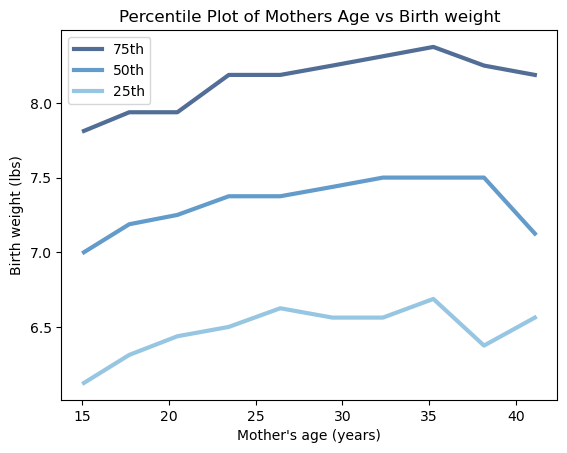

In [10]:
# Percentile Plot for Percentile 75,50 and 25
thinkplot.PrePlot(3)
for percent in [75,50,25]:
    # Creating a list to store the results
    cdf_weights2=[]
    # Looping through each value in cdf_weights
    for cdf in cdf_weights:
        # Using Percentile function to calculate the Value
        cdf_weight2=cdf.Percentile(percent)
        # Appending the Percentile Value to the list
        cdf_weights2.append(cdf_weight2)
    # Printing the result for each Percent
    print(f"Percentile {percent} Values are: {cdf_weights2}")   
    label = '%dth' % percent
    # Using CDF plot to plot the Mean ages vs Percentile values
    thinkplot.Plot(mean_ages, cdf_weights2, label=label)
    thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     title="Percentile Plot of Mothers Age vs Birth weight",
                      legend=True)
  

Percentile 80 Values are: [7.9375, 8.125, 8.125, 8.375, 8.375, 8.4375, 8.5625, 8.5625, 8.5, 8.5]
Percentile 60 Values are: [7.25, 7.5, 7.5, 7.625, 7.6875, 7.75, 7.75, 7.75, 7.6875, 7.3125]
Percentile 40 Values are: [6.625, 6.8125, 6.9375, 7.0625, 7.125, 7.1875, 7.1875, 7.25, 7.0625, 7.0]
Percentile 20 Values are: [6.0, 6.125, 6.25, 6.3125, 6.375, 6.4375, 6.375, 6.5, 6.3125, 5.9375]


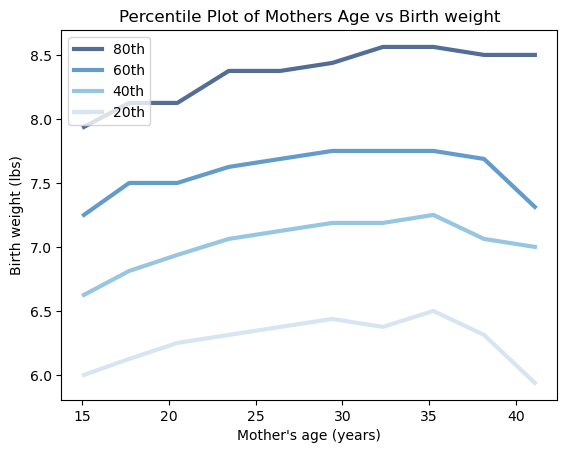

In [11]:
# Percentile Plot for Perecntile 80, 60, 40 and 20
thinkplot.PrePlot(4)

for percent in [80, 60, 40, 20]:
    # Creating a list to store the results
    cdf_weights2=[]
    # Looping through each value in cdf_weights
    for cdf in cdf_weights:
        # Using Percentile function to calculate the Value
        cdf_weight2=cdf.Percentile(percent)
        # Appending the Percentile Value to the list
        cdf_weights2.append(cdf_weight2)
    # Printing the result for each Percent
    print(f"Percentile {percent} Values are: {cdf_weights2}")   
    label = '%dth' % percent
    # Using CDF plot to plot the Mean ages vs Percentile values
    thinkplot.Plot(mean_ages, cdf_weights2, label=label)
    thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     title="Percentile Plot of Mothers Age vs Birth weight",
                      legend=True)
    

    


##### Perason's Correlation and Spearmen's Correlation

In [12]:
# Function to calculate Covariance. Covariance is the measure of how two variables vary together.
# To calculate the Covariance, we add up the product of their deviations from their mean.
def Cov(xs, ys, meanx=None, meany=None):
    """
    The function takes the arrays of x and y and their sample mean as inputs. 
    If mean is not provided it will be calculated in the function
    Returns the covariance.
    """
    # Converting the input to numpy array format
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    # If the means are not provided, they will be calculated
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    # Covariance is calculated by using numpy dot function. It multiples the difference of each element in 
    # xs and ys array from their respective mean and sums them. 
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


# Function to calculate the Pearson's Correlation
# Correlation defines the strength of relationship between two variables and can range between -1 and 1 
# (including -1 and 1). It is calculated by standardizing the Covariance by dividing it by thw product of 
# Standard Deviation of the two series.
def Corr(xs, ys):
    """
    Inputs are x and y arrays.
    Returns the Correlation between the two series.
    """
    # Converting the input to numpy array format
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    # Calculating the Mean and Variance of the two series and assigning to variables
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)
    # Correlation is calculated by standardizing Covariance by the product of Std deviation of 2 input series.
    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

# Function to calculate Spearman Correlation. In this method we compute the ranks of each variable in the
# input array and compute the correlation between them.
def SpearmanCorr(xs, ys):
    """
    Function to calculate Spearman's correlation.
    Inputs are x and y series.
    Returns the Spearman correlation between the variables.
    """
    # Calculates the rank of each variables in the input series and creates series of Rank values
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    # Computes the correlation on the Rank series.
    return Corr(xranks, yranks)

In [13]:
# Calculating the Pearson and Spearman's Correlation 
print(f"Pearson's Correlation between Mothers age and Birth weight is {Corr(mothers_age, birth_weight)}") 
print(f"Spearman Correlation between Mothers age and Birth weight is {SpearmanCorr(mothers_age, birth_weight)}") 

Pearson's Correlation between Mothers age and Birth weight is 0.0688339703541091
Spearman Correlation between Mothers age and Birth weight is 0.09461004109658226


#### ***Interpretation of the Plots:*** 
##### The Scatter plots shows that the relationship between Mothers age and the Baby's birth weight is not strong and this can be seen by the direction of points. They all look flat and it indicates not a strong relationship between these variables. 
##### The Pearson's Correlation is about 0.07 while Spearman's Correlation is about 0.09, both of them supports our earlier theory of not so strong relationship between the variables. But both the numbers indicate a positive correlation though. The marginal difference in the Correlation may be due to presence of Outliers in the dataset.
##### The results from the Percentile plot helps establish the theory. In the 25-50-75 Percentile plot, the birth weight appears to increase between mother's ages 15-25, after which the weight stays almost flat and for mother's age between 35-40 years, there is a drop in the baby weight. This indicates the relationship is not linear.
##### The results from 20-40-60-80 Percentile plot paints a similar picture, the baby weight appears to increase for Mothersage between 15-30 years after which it stays flat and drops around 35-40 years. Again this is not a linear relationship.

# Exercise 8.1

##### ***Question:*** In this chapter we used  x¯  and median to estimate µ, and found that  x¯  yields lower MSE. Also, we used  S2  and  S2n−1  to estimate σ, and found that  S2  is biased and  S2n−1  unbiased. Run similar experiments to see if  x¯  and median are biased estimates of µ. Also check whether  S2  or  S2n−1  yields a lower MSE.

##### ***Solution:*** Before getting into the code, we have to define two functions, one to calculate the Root Mean squared error and the Mean error. To calculate the Root Mean squared error, we square the difference of each input in the estimated values array from the actual value and compute the suare root of its mean. To calculate the Mean error, we find the difference of each value in the estimated values array from its actual and find the mean value of all the differences.


In [14]:
# Function to calculate the Root Mean Squared Error
def RootMeanSquareError(estimated_values, actual_value):
    """Computes the root mean squared error of a sequence of estimates.

    estimated_values: sequence of numbers
    actual_value: actual value

    returns: Root Mean Squared Error
    """
    # Create a list that stoes the differences between estimated and actual values
    errors1=[]
    # Looping through each value in estimated value array and computing the difference from actual value
    for estimated_value in estimated_values:
        # Appending the square of the deviation to the list
        errors1.append((estimated_value-actual_value)**2)
    # Computing the mean of all values in the list
    mean_square_error = np.mean(errors1)
    # Returns the Square root of mean calculated above
    return np.sqrt(mean_square_error)



# Function to calculate the mean error of a series of input values
def MeanError(estimated_values, actual_value):
    """Computes the mean error of a sequence of estimates.

    estimated_values: sequence of numbers
    actual_value: actual value

    returns: float mean error
    """
    # Create a list that stoes the differences between estimated and actual values
    errors2=[]
    # Looping through each value in estimated value array and computing the difference from actual value
    for estimated_value in estimated_values:
        # Appending the diference of each estimate from the actual value
        errors2.append(estimated_value-actual_value)
    # Returns the Mean value of the deviations calculated in the list error2
    return np.mean(errors2)

In [15]:
# Function to calculate Mean error of xbar and Median
def Mean_Error_Estimation(sample_size, nbr_iterations):
    """Mean error for xbar and median as estimators of population mean.
    Inputs are : sample size and number of iterations the experiment will be conducted
    """
    # Setting the mean and standard Deviation of our distribution
    mu_mean = 0
    std_deviation = 1
    # Lists to collect the mean and meadian of the samples
    sample_means = []
    sample_medians = []
    # loop through each iteration through the total number of iterations
    for iteration in range(nbr_iterations):
        input_series=[]
        # For each iteration generate random normal distribution values for the given mean and std deviation
        for sample in range(sample_size):
            # Add the random normal distribution value to the list
            input_series.append(random.gauss(mu_mean, std_deviation))
        # Compute the mean and median of the values in the input series for each iteration
        xbar = np.mean(input_series)
        median = np.median(input_series)
        # Append the mean and median for each iteration to the list
        sample_means.append(xbar)
        sample_medians.append(median)
    # Print the Mean error of xbar and Median using the MeanError function
    print(f'The Mean error of xbar for sample size {sample_size} and {nbr_iterations} number of Iterations is {MeanError(sample_means,mu_mean)}') 
    print(f'The Mean error of Median for sample size {sample_size} and {nbr_iterations} number of Iterations is {MeanError(sample_medians,mu_mean)}') 
    


In [16]:
# Calling the Mean_Error_Estimation for sample size of 7 with different number of Iteration cycles.
Mean_Error_Estimation(sample_size=7, nbr_iterations=1000)
Mean_Error_Estimation(sample_size=7, nbr_iterations=10000)
Mean_Error_Estimation(sample_size=7, nbr_iterations=100000)
#Mean_Error_Estimation(sample_size=7, nbr_iterations=1000000)
#Mean_Error_Estimation(sample_size=7, nbr_iterations=10000000)

The Mean error of xbar for sample size 7 and 1000 number of Iterations is 0.01384511205182895
The Mean error of Median for sample size 7 and 1000 number of Iterations is 0.0061781538397123106
The Mean error of xbar for sample size 7 and 10000 number of Iterations is 0.004835950998165201
The Mean error of Median for sample size 7 and 10000 number of Iterations is 0.0060692203356449755
The Mean error of xbar for sample size 7 and 100000 number of Iterations is 0.0006115160514661141
The Mean error of Median for sample size 7 and 100000 number of Iterations is 0.00029776974990428556


In [17]:
# Calling the Mean_Error_Estimation for 1000 iterations with different sample sizes
Mean_Error_Estimation(sample_size=7, nbr_iterations=1000)
Mean_Error_Estimation(sample_size=25, nbr_iterations=1000)
Mean_Error_Estimation(sample_size=100, nbr_iterations=1000)
Mean_Error_Estimation(sample_size=500, nbr_iterations=1000)
Mean_Error_Estimation(sample_size=1000, nbr_iterations=1000)

The Mean error of xbar for sample size 7 and 1000 number of Iterations is 0.007944942867875027
The Mean error of Median for sample size 7 and 1000 number of Iterations is 0.0072936869701912405
The Mean error of xbar for sample size 25 and 1000 number of Iterations is 0.00116390648704923
The Mean error of Median for sample size 25 and 1000 number of Iterations is -0.0019773724570392092
The Mean error of xbar for sample size 100 and 1000 number of Iterations is -0.0031763530614924997
The Mean error of Median for sample size 100 and 1000 number of Iterations is -0.0006220114170820347
The Mean error of xbar for sample size 500 and 1000 number of Iterations is -0.0013460243172349633
The Mean error of Median for sample size 500 and 1000 number of Iterations is -0.0008574051343021992
The Mean error of xbar for sample size 1000 and 1000 number of Iterations is 0.00018571736640033787
The Mean error of Median for sample size 1000 and 1000 number of Iterations is 0.0007190482567972018


#### ***Interpretation of Results:***
#### In the above experiment, as the number of iterations of the experiment increased the mean error of xbar and median got smaller and closer to zero. So there is no indication of bias in the results. Same results are observed in the experiment where the sample size was increased repeating the experiment for same number of iterations. As the sample size increased, the mean error was getting smaller and closer to zero.


In [18]:
# Function to calculate Mean error of xbar and Median
def RMSE_Estimation(sample_size, nbr_iterations):
    """Root Mean squared error for xbar and median as estimators of population mean.
    Inputs are : sample size and number of iterations the experiment will be conducted
    """
    # Setting the mean and standard Deviation of our distribution
    mu_mean = 0
    std_deviation = 1
    sigma_variance=std_deviation**2
    # Lists to collect the biased and unbiased estimates
    biased_estimates = []
    unbiased_estimates = []
    # loop through each iteration through the total number of iterations
    for iteration in range(nbr_iterations):
        input_series=[]
        # For each iteration generate random normal distribution values for the given mean and std deviation
        for sample in range(sample_size):
            # Add the random normal distribution value to the list
            input_series.append(random.gauss(mu_mean, std_deviation))
        # Calculate the biased and unbiased variance of the inpute series.
        biased_var = np.var(input_series)
        unbiased_var = np.var(input_series, ddof=1)
        # Append the results of biased and unbiased variance to the lists
        biased_estimates.append(biased_var)
        unbiased_estimates.append(unbiased_var)
    # Print the Mean error of xbar and Median using the MeanError function
    print(f'The RMSE of Biased S2 for sample size {sample_size} and {nbr_iterations} number of Iterations is {RootMeanSquareError(biased_estimates, sigma_variance)}') 
    print(f'The RMSE of UnBiased S2n-1 for sample size {sample_size} and {nbr_iterations} number of Iterations is {RootMeanSquareError(unbiased_estimates, sigma_variance)}')
    


In [19]:
# Calling the RMSE_Estimation for sample size of 7 with different number of Iteration cycles.
RMSE_Estimation(sample_size=7, nbr_iterations=100000)
RMSE_Estimation(sample_size=7, nbr_iterations=10000)
RMSE_Estimation(sample_size=7, nbr_iterations=1000)

The RMSE of Biased S2 for sample size 7 and 100000 number of Iterations is 0.5170410072919012
The RMSE of UnBiased S2n-1 for sample size 7 and 100000 number of Iterations is 0.5794011801100474
The RMSE of Biased S2 for sample size 7 and 10000 number of Iterations is 0.5171163707567645
The RMSE of UnBiased S2n-1 for sample size 7 and 10000 number of Iterations is 0.5778391532317434
The RMSE of Biased S2 for sample size 7 and 1000 number of Iterations is 0.5302404843531898
The RMSE of UnBiased S2n-1 for sample size 7 and 1000 number of Iterations is 0.5996348085991506


In [20]:
# Calling the RMSE_Estimation for 1000 iterations with different number of Sample sizes.
RMSE_Estimation(sample_size=7, nbr_iterations=1000)
RMSE_Estimation(sample_size=50, nbr_iterations=1000)
RMSE_Estimation(sample_size=100, nbr_iterations=1000)
RMSE_Estimation(sample_size=500, nbr_iterations=1000)
RMSE_Estimation(sample_size=1000, nbr_iterations=1000)
RMSE_Estimation(sample_size=10000, nbr_iterations=1000)

The RMSE of Biased S2 for sample size 7 and 1000 number of Iterations is 0.5154242486963454
The RMSE of UnBiased S2n-1 for sample size 7 and 1000 number of Iterations is 0.5813230336110294
The RMSE of Biased S2 for sample size 50 and 1000 number of Iterations is 0.19583967959040688
The RMSE of UnBiased S2n-1 for sample size 50 and 1000 number of Iterations is 0.19873072305813339
The RMSE of Biased S2 for sample size 100 and 1000 number of Iterations is 0.13917382117257515
The RMSE of UnBiased S2n-1 for sample size 100 and 1000 number of Iterations is 0.1404231680055568
The RMSE of Biased S2 for sample size 500 and 1000 number of Iterations is 0.062187561872365286
The RMSE of UnBiased S2n-1 for sample size 500 and 1000 number of Iterations is 0.06227594499541611
The RMSE of Biased S2 for sample size 1000 and 1000 number of Iterations is 0.0444283930498812
The RMSE of UnBiased S2n-1 for sample size 1000 and 1000 number of Iterations is 0.044453951932331565
The RMSE of Biased S2 for sampl

#### ***Interpretation of Results:***
#### The results indicate that Root Mean squared error of Biased estimate of variance was smaller than that of unbiased by about 12%. Even after increasing the number of iterations keeping the same sample size , the difference between biased and unbiased estimates remained the same.
#### In the other experiment where the number of iterations were constant and the sample size was increased, the difference between biased and unbiased estimates kept shrinking as the sample size increased to the point where there was hardly a noticeable difference in the experiment with 10,000 sample size.

# Exercise 8.2

##### ***Question:***  Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.Repeat the experiment with a few different values of n and make a plot of standard error versus n.

##### ***Solution:*** 

##### ***Step 1:*** To begin with , we first generate exponential distribution for sample size of 10 and lambda of 2  and create the mean of the sample. The estimator of Lambda is calculated as L=  1/mean(sample). We repeat the experiment for the number of iterations . 

##### ***Step 2:*** We then measure the standard error of the estimates calculated above using Root Mean squared Error function that gives us the standard error for the given value of Sample size and number of iterations the experiment is conducted.

##### ***Step 3:*** To calculate the Confidence Interval of 90%, we have to identify the Percentile of 5 and 95 (the difference between 95 and 5 is 90 which gives us the 90% Confidence interval). To get the Percentile values, we have to calculate the CDF using the estimated values. These results can then be plotted in the CDF plot

In [21]:
def createExponentialSample(lambd,sample_size,iterations,plot_graphs_ind=True):
    """
        Function to create Sampling Exponential distribution and calculate the L which is the estimator for Lambda
        Inputs: lambd: parameter of an exponential distribution , sample_size and number of iterations
        plot_graphs_ind is used to denote of we want to plot the graphs
        Returns the standardError of Estimator L and also plots the CDF graph
    """
    # Create an empty list that stores the estimated values for each iteration
    exp_estimates = []
    # Loop through the number of iterations
    for iteration in range(iterations):
        # Create Exponential samples for the given value of Lambda and Sample size
        exponential_samples = np.random.exponential(1.0/lambd, sample_size)
        estimator = 1.0 / np.mean(exponential_samples)
        exp_estimates.append(estimator)
    # Calculate the Standard Error by measuring the Root Mean squared error between Estimated value of
    # lambda and the actual value.
    RMSE_lambda = RootMeanSquareError(exp_estimates, lambd)
    print(f"The Root Mean squared Error of Exponential distribution's Estimated value of Lambda {lambd} for the sample size {sample_size} and {iterations} iteartions is {RMSE_lambda}")        
    if plot_graphs_ind:
        lambda_cdf(exp_estimates)
    return RMSE_lambda

def lambda_cdf(exp_estimates):
    # Calculating and plotting the CDF
    lambda_cdf = thinkstats2.Cdf(exp_estimates)
    # Calculating the Confidence Intervals of 90% by calculating Percentile 5 and 95 
    ci_05=lambda_cdf.Percentile(5)
    ci_95=lambda_cdf.Percentile(95)
    print(f"The 90% Confidence interval is {ci_05}, {ci_95}")
    # Plotting the CDF function using thinkplot
    thinkplot.Cdf(lambda_cdf)
    # plot vertical lines using Matplotlib to represent the Confidence Intervals
    plt.vlines(x = [ci_05,ci_95], ymin = 0, ymax = 1,colors = 'teal',linewidth=1)
    thinkplot.Config(xlabel='Lambda Estimate',
                     ylabel='CDF of Lambda',
                     title='Exponential Sampling distribution for Lambda')
    

The Root Mean squared Error of Exponential distribution's Estimated value of Lambda 2 for the sample size 10 and 1000 iteartions is 0.8174634316820668
The 90% Confidence interval is 1.268751524102943, 3.751481031710238


0.8174634316820668

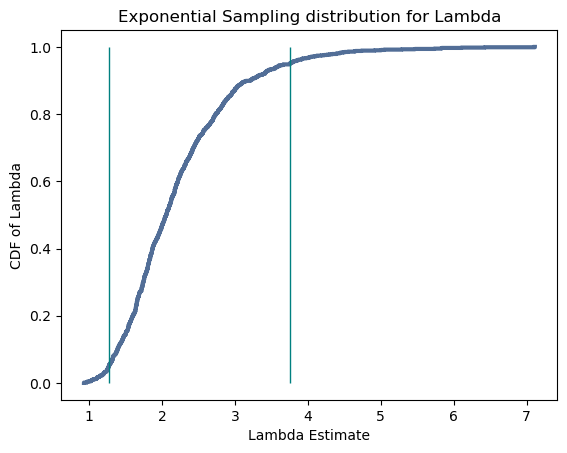

In [22]:
# Create Sample exponnential distribution for Lambda 2, 10 sample size and 1000 iterations plotting the results
createExponentialSample(2,10,1000,plot_graphs_ind=True)
# The plot highlights the 0th and 95th percentile in the plot. 

The Root Mean squared Error of Exponential distribution's Estimated value of Lambda 2 for the sample size 3 and 1000 iteartions is 2.709937436150672
The Root Mean squared Error of Exponential distribution's Estimated value of Lambda 2 for the sample size 4 and 1000 iteartions is 1.8541729269714253
The Root Mean squared Error of Exponential distribution's Estimated value of Lambda 2 for the sample size 5 and 1000 iteartions is 1.3943132062794867
The Root Mean squared Error of Exponential distribution's Estimated value of Lambda 2 for the sample size 6 and 1000 iteartions is 1.2798976392793013
The Root Mean squared Error of Exponential distribution's Estimated value of Lambda 2 for the sample size 7 and 1000 iteartions is 1.04998764165899
The Root Mean squared Error of Exponential distribution's Estimated value of Lambda 2 for the sample size 8 and 1000 iteartions is 0.9064042005159403
The Root Mean squared Error of Exponential distribution's Estimated value of Lambda 2 for the sample si

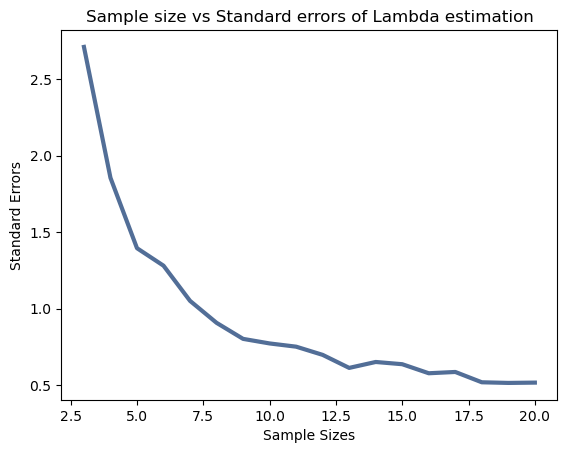

In [23]:
def plot_RMSE_lambdas():
    """
    Function to calculate Standard Errors for Lambda of Exponential distribution with 
    sample size from 3 to 20
    1000 Iterations 
    Lambda of 2
    """
    # Create an empty list of storing standard errors for Lmbda
    RMSE_lambdas=[]
    # creating a list of sample sizes from 3 to 20
    sample_sizes=list(range(3,21))
    # Loop through each value of sample size
    for sample_size in sample_sizes:
        # Use createExponentialSample function to estimate Lambda
        RMSE_lambda=createExponentialSample(lambd=2,sample_size=sample_size,iterations=1000,plot_graphs_ind=False)
        # Append the estimates to the list
        RMSE_lambdas.append(RMSE_lambda)
    print(RMSE_lambdas)
    # Plotting the Sample size vs  Standard Errors 
    thinkplot.Plot(sample_sizes,RMSE_lambdas) 
    thinkplot.Config(xlabel='Sample Sizes',
                     ylabel='Standard Errors',title="Sample size vs Standard errors of Lambda estimation")

plot_RMSE_lambdas()


##### ***Interpretation of the plot:*** The plot above indicates that as the Sample size increases the Standard error in estimating Lambda decreases